# Data Wrangling for Hotel Customer Data set

## 1. Import and load the data

In [60]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import copy
%matplotlib inline

In [2]:
# Data Collection
file_name = 'HotelCustomersDataset.tsv'
df = pd.read_csv(file_name, sep = '\t')
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Data Definition - Understand columns and structures

For column descriptions, check the data source article at https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub

In [3]:
# Basic information about the dataframe
df.info()

# List of columns
print("There are %d columns." % len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

There are total 31 columns.
- 5 categorial columns: Nationality, NameHash, DocIDHash, DistributionChannel, and MarketSegment
- 26 numerical columns (could have either numerical or boolean values)

There are total 83590 rows. 'Age' column has some missing values.
NameHash and DocIDHash represent customers' names and ID numbers in unique keys. Since they are unique to each customer, we cannot find common patterns among customers using these features. Therefore, they will not contribute to the clustering algorithms and we can decide to drop them for this project.


In [4]:
# Drop NameHash and DocIDHash
df = df.drop(['NameHash','DocIDHash'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   AverageLeadTime       83590 non-null  int64  
 5   LodgingRevenue        83590 non-null  float64
 6   OtherRevenue          83590 non-null  float64
 7   BookingsCanceled      83590 non-null  int64  
 8   BookingsNoShowed      83590 non-null  int64  
 9   BookingsCheckedIn     83590 non-null  int64  
 10  PersonsNights         83590 non-null  int64  
 11  RoomNights            83590 non-null  int64  
 12  DaysSinceLastStay     83590 non-null  int64  
 13  DaysSinceFirstStay    83590 non-null  int64  
 14  DistributionChannel   83590 non-null  object 
 15  MarketSegment      

In [5]:
# Check summary statistics
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The 'Age' column has missing values and incorrect data (negative values) so we will need to clean it up. We will also explore data quality for numerical columns and boolean columns, separately.

## 3. Explore and clean the data

### 3.1 Missing data

In [6]:
# Number of missing values by columns
missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'], ascending = False)

,count,%
Age,3779,4.520876
ID,0,0.000000
Nationality,0,0.000000
DaysSinceCreation,0,0.000000
AverageLeadTime,0,0.000000
LodgingRevenue,0,0.000000
OtherRevenue,0,0.000000
BookingsCanceled,0,0.000000
BookingsNoShowed,0,0.000000
BookingsCheckedIn,0,0.000000


There are 4.5% of customer records with missing age data. Let's quickly check the data for those customers.

In [7]:
# Check customers with missing age data
missing_age = df[df['Age'].isnull()]
missing_age.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,3779.000000,0.0,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,...,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.0,3779.000000,3779.0,3779.000000
mean,30564.220164,NaN,604.807356,53.236306,227.895337,59.834678,0.005822,0.001852,0.829849,3.609950,...,0.000794,0.001323,0.000265,0.009791,0.254035,0.123842,0.0,0.002117,0.0,0.035194
std,23879.422399,NaN,332.874209,81.668457,457.564384,145.264834,0.082753,0.048773,0.799615,3.993015,...,0.028168,0.036355,0.016267,0.098477,0.435375,0.329445,0.0,0.045968,0.0,0.184295
min,2.000000,NaN,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,8717.500000,NaN,288.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,25658.000000,NaN,633.000000,13.000000,144.500000,27.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,49072.500000,NaN,922.000000,76.000000,295.500000,68.500000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000
max,83536.000000,NaN,1095.000000,588.000000,21781.000000,5105.500000,2.000000,2.000000,29.000000,62.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


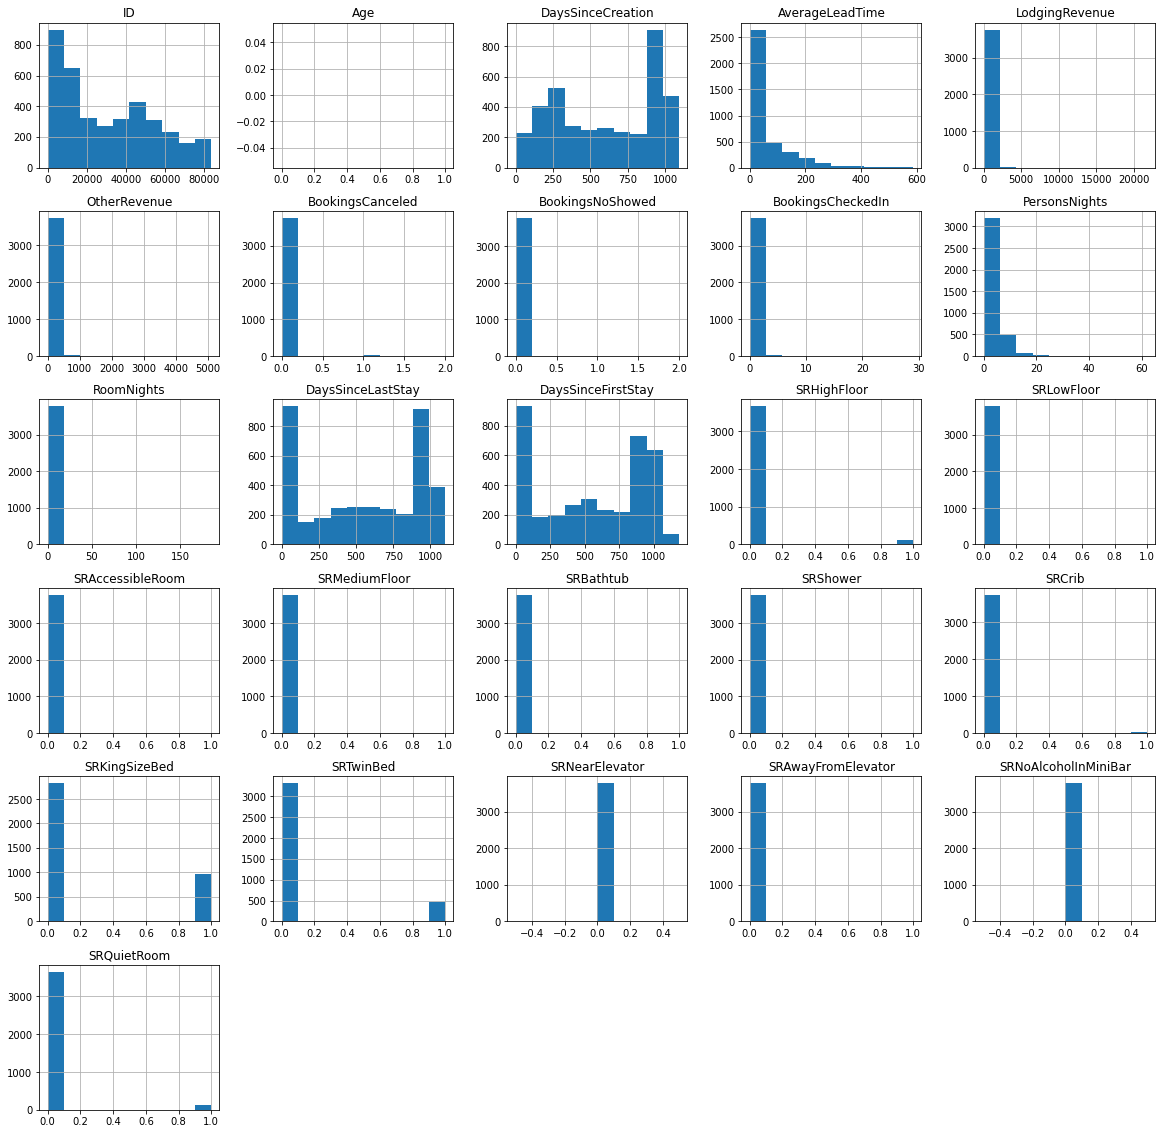

In [50]:
# Check the distribution of those records with missing age
missing_hist = missing_age.hist(figsize= (20,20))

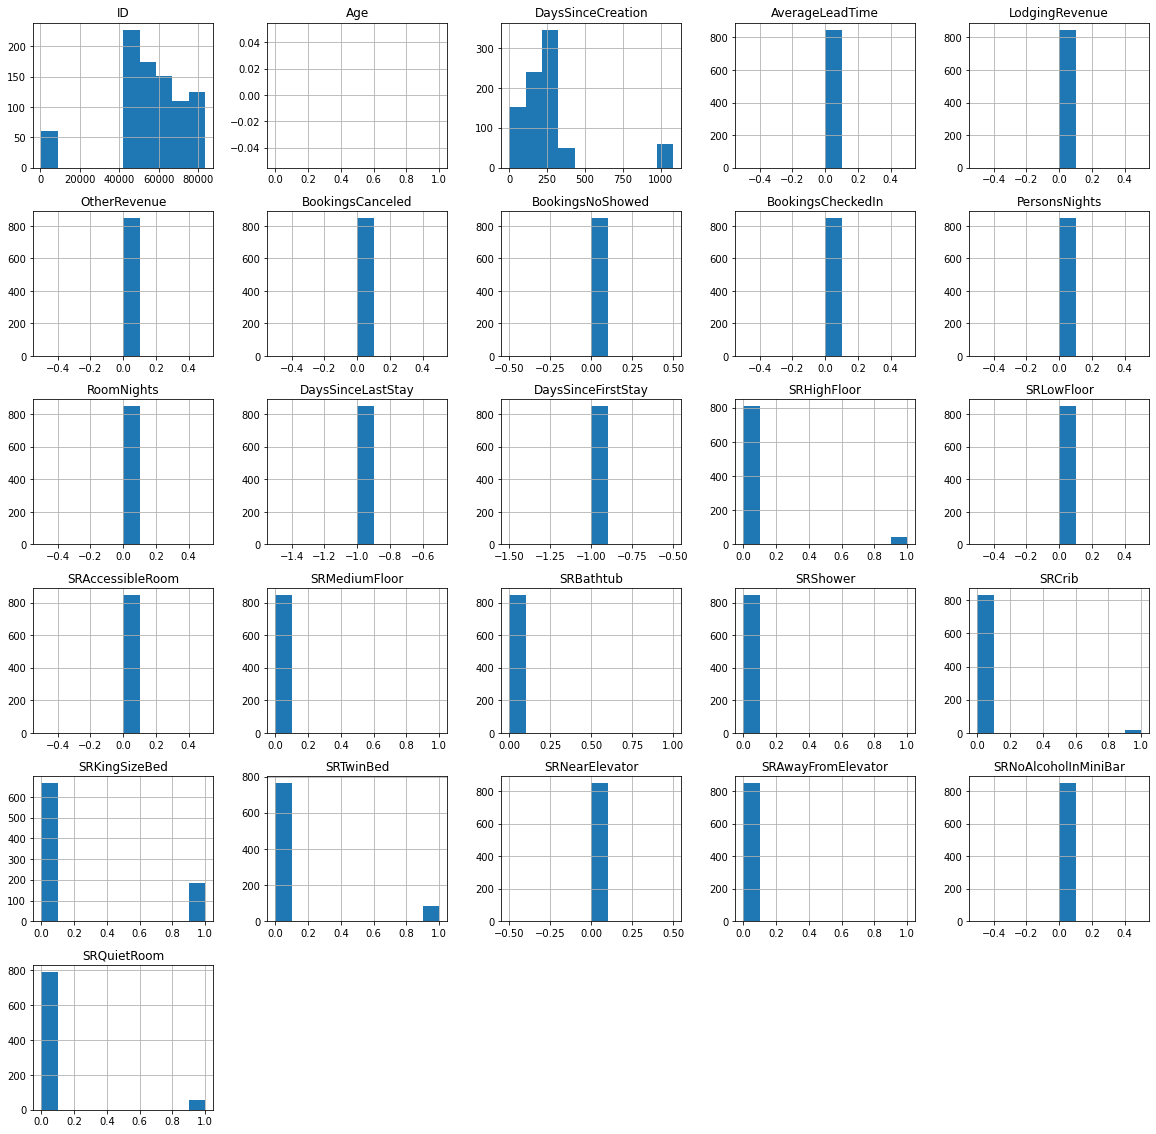

In [88]:
# Did they actually stay (check-in) at the hotel?
missing_nocheckin_hist = missing_age[missing_age['BookingsCheckedIn'] == 0.0].hist(figsize= (20,20))

There are more than 800 customers who didn't stay at the hotel (bookingscheckedin equal 0, LodgingRevenue equal 0). Hence, missing age data.

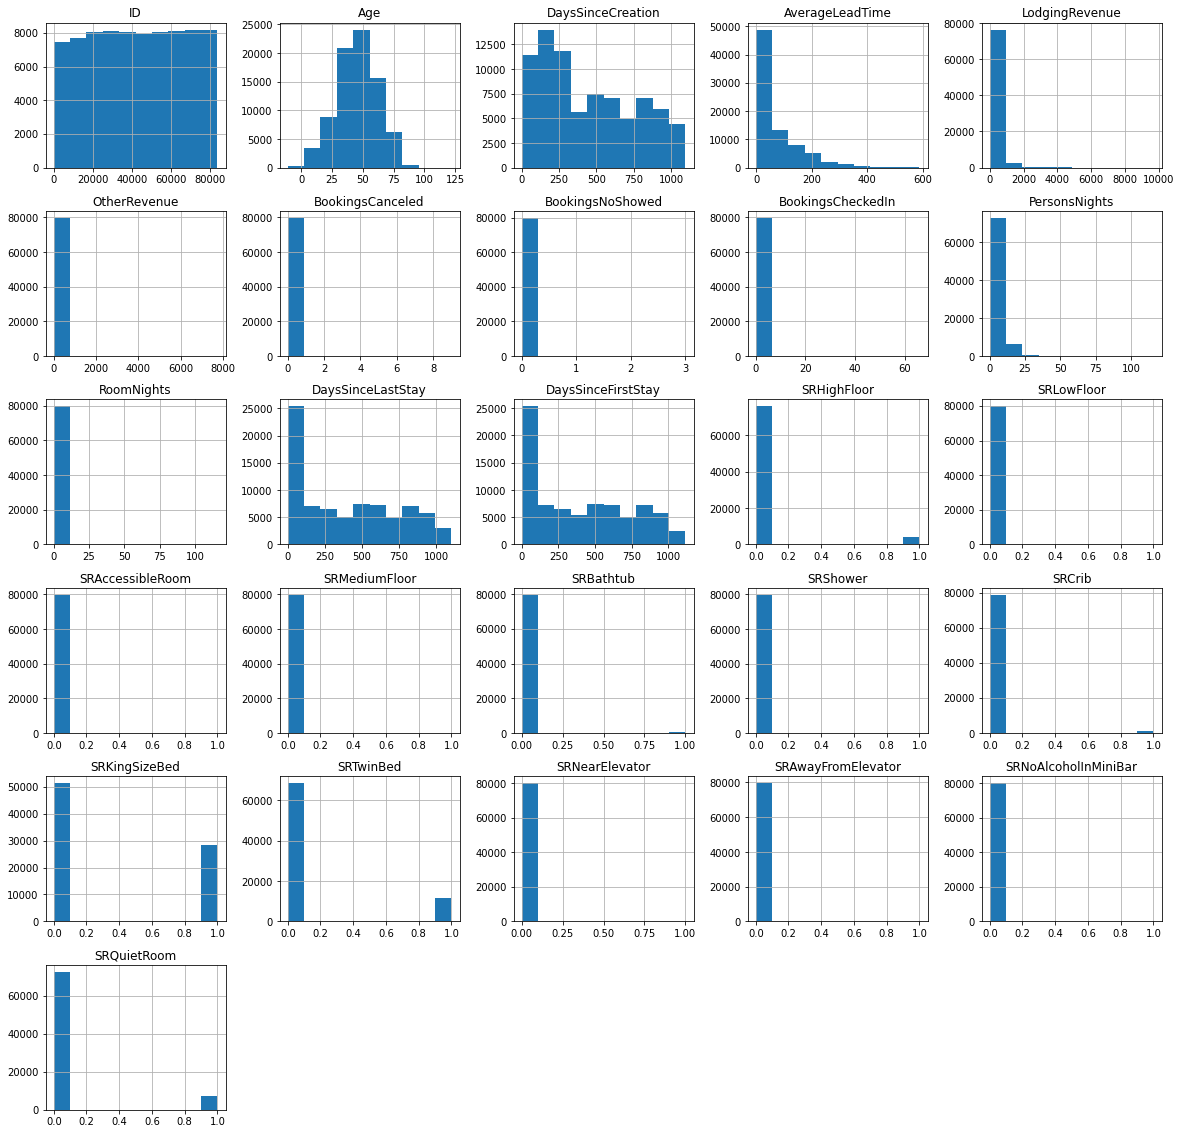

In [69]:
# Compare with the distribution of the whole dataframe (without missing age data)
nonull_df = df[~df['Age'].isnull()]
nonull_hist = nonull_df.hist(figsize= (20,20))

In terms of numerical features, the data of records with missing age look very similar with the rest of the dataframe. It means that the missing records might have been caused by random events instead of a systematic error.
The biggest difference is in DaysSinceCreation. As compared to the rest of the data set, among customers with missing age, there are higher percentage of whom with older creation days (more than 1.5 years). One possibility is that the hotel didn't consistently start recording customers' DOB until recently.

However, let's check categorical features. Who are the people with missing age?

In [61]:
# Categorical features for missing age data
missing_age.select_dtypes(['object'])

,Nationality,DistributionChannel,MarketSegment
1,PRT,Travel Agent/Operator,Travel Agent/Operator
20,PRT,Travel Agent/Operator,Other
38,PRT,Direct,Complementary
39,PRT,Direct,Complementary
55,PRT,Travel Agent/Operator,Travel Agent/Operator
...,...,...,...
83020,PRT,Travel Agent/Operator,Other
83041,PRT,Travel Agent/Operator,Other
83331,PRT,Travel Agent/Operator,Other
83383,PRT,Travel Agent/Operator,Other


In [62]:
# Check nationalities of those with missing age
missing_age['Nationality'].value_counts()

PRT    3777
PAN       1
ESP       1
Name: Nationality, dtype: int64

Almost ALL of the missing age records are from Portugal!

In [63]:
# Check Distribution Channel of those with missing age
missing_age['DistributionChannel'].value_counts()

Travel Agent/Operator      2877
Direct                      604
Corporate                   282
Electronic Distribution      16
Name: DistributionChannel, dtype: int64

In [64]:
# Check Market Segment of those with missing age
missing_age['MarketSegment'].value_counts()

Other                    1835
Groups                    640
Direct                    519
Travel Agent/Operator     417
Corporate                 255
Complementary              92
Aviation                   21
Name: MarketSegment, dtype: int64

In [65]:
# Compare with categorical features of people without missing age

# Choose columns with 'object' type
nonull_df.select_dtypes(['object'])

,Nationality,DistributionChannel,MarketSegment
0,PRT,Corporate,Corporate
2,DEU,Travel Agent/Operator,Travel Agent/Operator
3,FRA,Travel Agent/Operator,Travel Agent/Operator
4,FRA,Travel Agent/Operator,Travel Agent/Operator
5,JPN,Travel Agent/Operator,Other
...,...,...,...
83585,ITA,Travel Agent/Operator,Other
83586,IRL,Travel Agent/Operator,Other
83587,IRL,Travel Agent/Operator,Other
83588,IRL,Travel Agent/Operator,Other


In [70]:
# What are the nationalities of people without missing age?
nonull_df['Nationality'].value_counts()

FRA    12422
DEU    10232
GBR     8656
PRT     7820
ESP     4901
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In terms of nationality, the hotel has French customers the most, followed by German, UK, and Portugal customers. Domestic customers (PRT) take up only 9.8% of the total number of customers. The rest are international customers.

In [71]:
# What are the Distribution Channels of people without missing age?
nonull_df['DistributionChannel'].value_counts()

Travel Agent/Operator      65692
Direct                     11308
Corporate                   2318
Electronic Distribution      493
Name: DistributionChannel, dtype: int64

In [73]:
# What are the Market Segments of people without missing age?
nonull_df['MarketSegment'].value_counts()

Other                    46204
Travel Agent/Operator    11253
Direct                   10938
Groups                    8861
Corporate                 1914
Complementary              418
Aviation                   223
Name: MarketSegment, dtype: int64

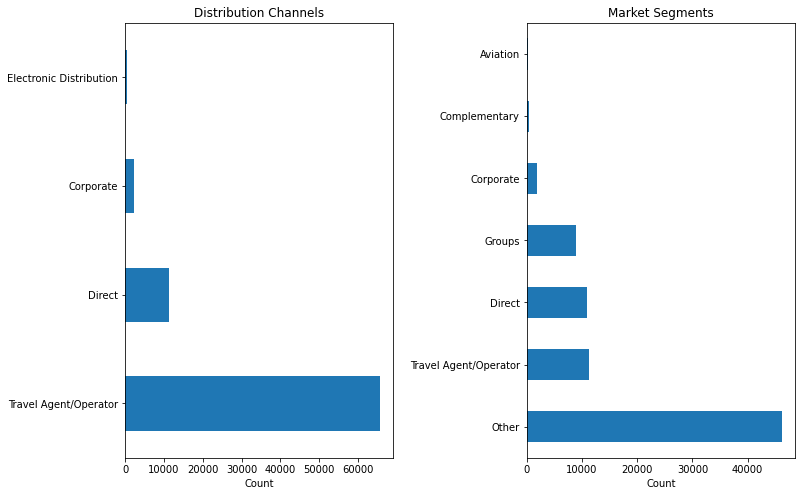

In [74]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
nonull_df['DistributionChannel'].value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a title
ax[0].set_title('Distribution Channels')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')

#Specify a horizontal barplot ('barh') as kind of plot (kind=)
nonull_df['MarketSegment'].value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a title
ax[1].set_title('Market Segments')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

The hotel's strongest distribution channel (where they acquired customers) is through Travel Agent or Operator.
In terms of Market Segments, however, vast majority of the customers are in the "Other" segment. While this column provides some interesting insights, there is no explanation for "Other" segment in business term.

## Go back to the missing age data:
There are 3779 records (4.5%) that don't have 'Age' data
There are more than 800 records that did not have 'Age' data because they didn't stay at the hotel.
Compared to the distribution of non-missing records, records with missing age seem to be older records.
Besides the fact that 99.9% of people with missing age are from Portugal (domestic customers), there aren't any other specialties about them.


Some of my guesses are:
- Portugal allows their citizens to use some sorts of identification documents that don't have a date of birth when booking hotels --> No age records
- The hotel didn't start to consistently record customers' DOB until recently. Which might also explain the all-Portugal fact: when the hotel first established the data system, they might have had a lot more domestic customers than international customers. At that time, they also didn't have the procedure of recording every customer's date of birth.

What to do with missing data?

Option 1: Drop the missing data
- Why: because current hotel's biggest customers are from France, Germany, and UK. Domestic customers account for less than 10% of the customer base. Depends on Marketing budget, we might not be interested in them.
- Why not: because we might be interested in targeting older customers to retain/ welcome them back to stay at the hotel.

Option 2: Impute the missing data
- Why: because we will have a complete data set without worrying about dropping important customers.
- Why not: because we don't know if the impute method can be trusted. (Can cause bias towards the non-missing data)

Option 3: Drop records of people who didn't stay at the hotel. Impute the rest but conduct clustering separately with the non-missing set.

### 3.3 Explore numerical data

Based on understanding the definition of each column, we know what there are numerical columns and boolean columns.

Numerical columns are:
- ID
- Age
- DaysSinceCreation
- AverageLeadTime (avg. days between booking dates and arrival dates)
- LodgingRevenue
- OtherRevenue
- BookingsCanceled (no. of bookings made then canceled)
- BookingsNoShowed (no. of bookings made then no-show)
- BookingsCheckedIn (no. of bookings made then checked in and stayed)
- PersonsNights (sum of all bookings' persons/nights (no. of persons multiply by no. of nights))
- RoomNights (total room/nights for checked-in bookings. room/nights = no. of rooms * no. of bookings)
- DaysSinceLastStay (data extraction date - last arrival of a booking. -1 = never stayed)
- DaysSinceFirstStay (data extraction date - first arrival of a booking. -1 = never stayed)

In [75]:
# Check Customer ID's duplicates
df['ID'].value_counts()

1        1
55714    1
55732    1
55731    1
55730    1
        ..
27863    1
27862    1
27861    1
27860    1
83590    1
Name: ID, Length: 83590, dtype: int64

There is no duplicate in the customer ID. We now assume that each record represents a unique customer.

In [76]:
# Check and clean 'Age' column
df[df['Age'] < 0]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2053,2054,BIH,-7.0,1034,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,2470,ATF,-7.0,1029,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,5129,FRA,-9.0,981,66,93.30,14.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6751,6752,GBR,-11.0,953,22,450.00,18.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8360,8361,DEU,-7.0,927,256,126.00,109.00,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8628,8629,NLD,-10.0,923,111,414.60,34.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9919,9920,DZA,-6.0,903,54,138.93,29.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10662,10663,DEU,-10.0,891,292,126.00,113.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10694,10695,DEU,-10.0,891,292,128.00,57.50,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10755,10756,PRT,-6.0,891,292,128.00,55.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0


There are 17 rows with negative Ages.

In [79]:
# Create sub dataframe for all numerical columns
numerical_columns = ['ID','Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights','DaysSinceLastStay','DaysSinceFirstStay']